In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [2]:
df=pd.read_csv('fetal_health.csv')
print(df.head())
print(df.shape)

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [3]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

[]


In [4]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [7]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

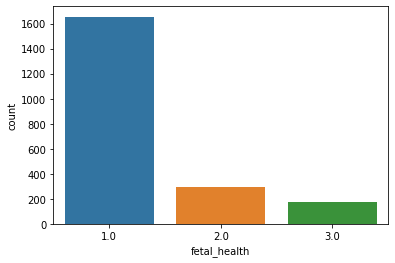

In [8]:
sns.countplot(x='fetal_health',data=df)

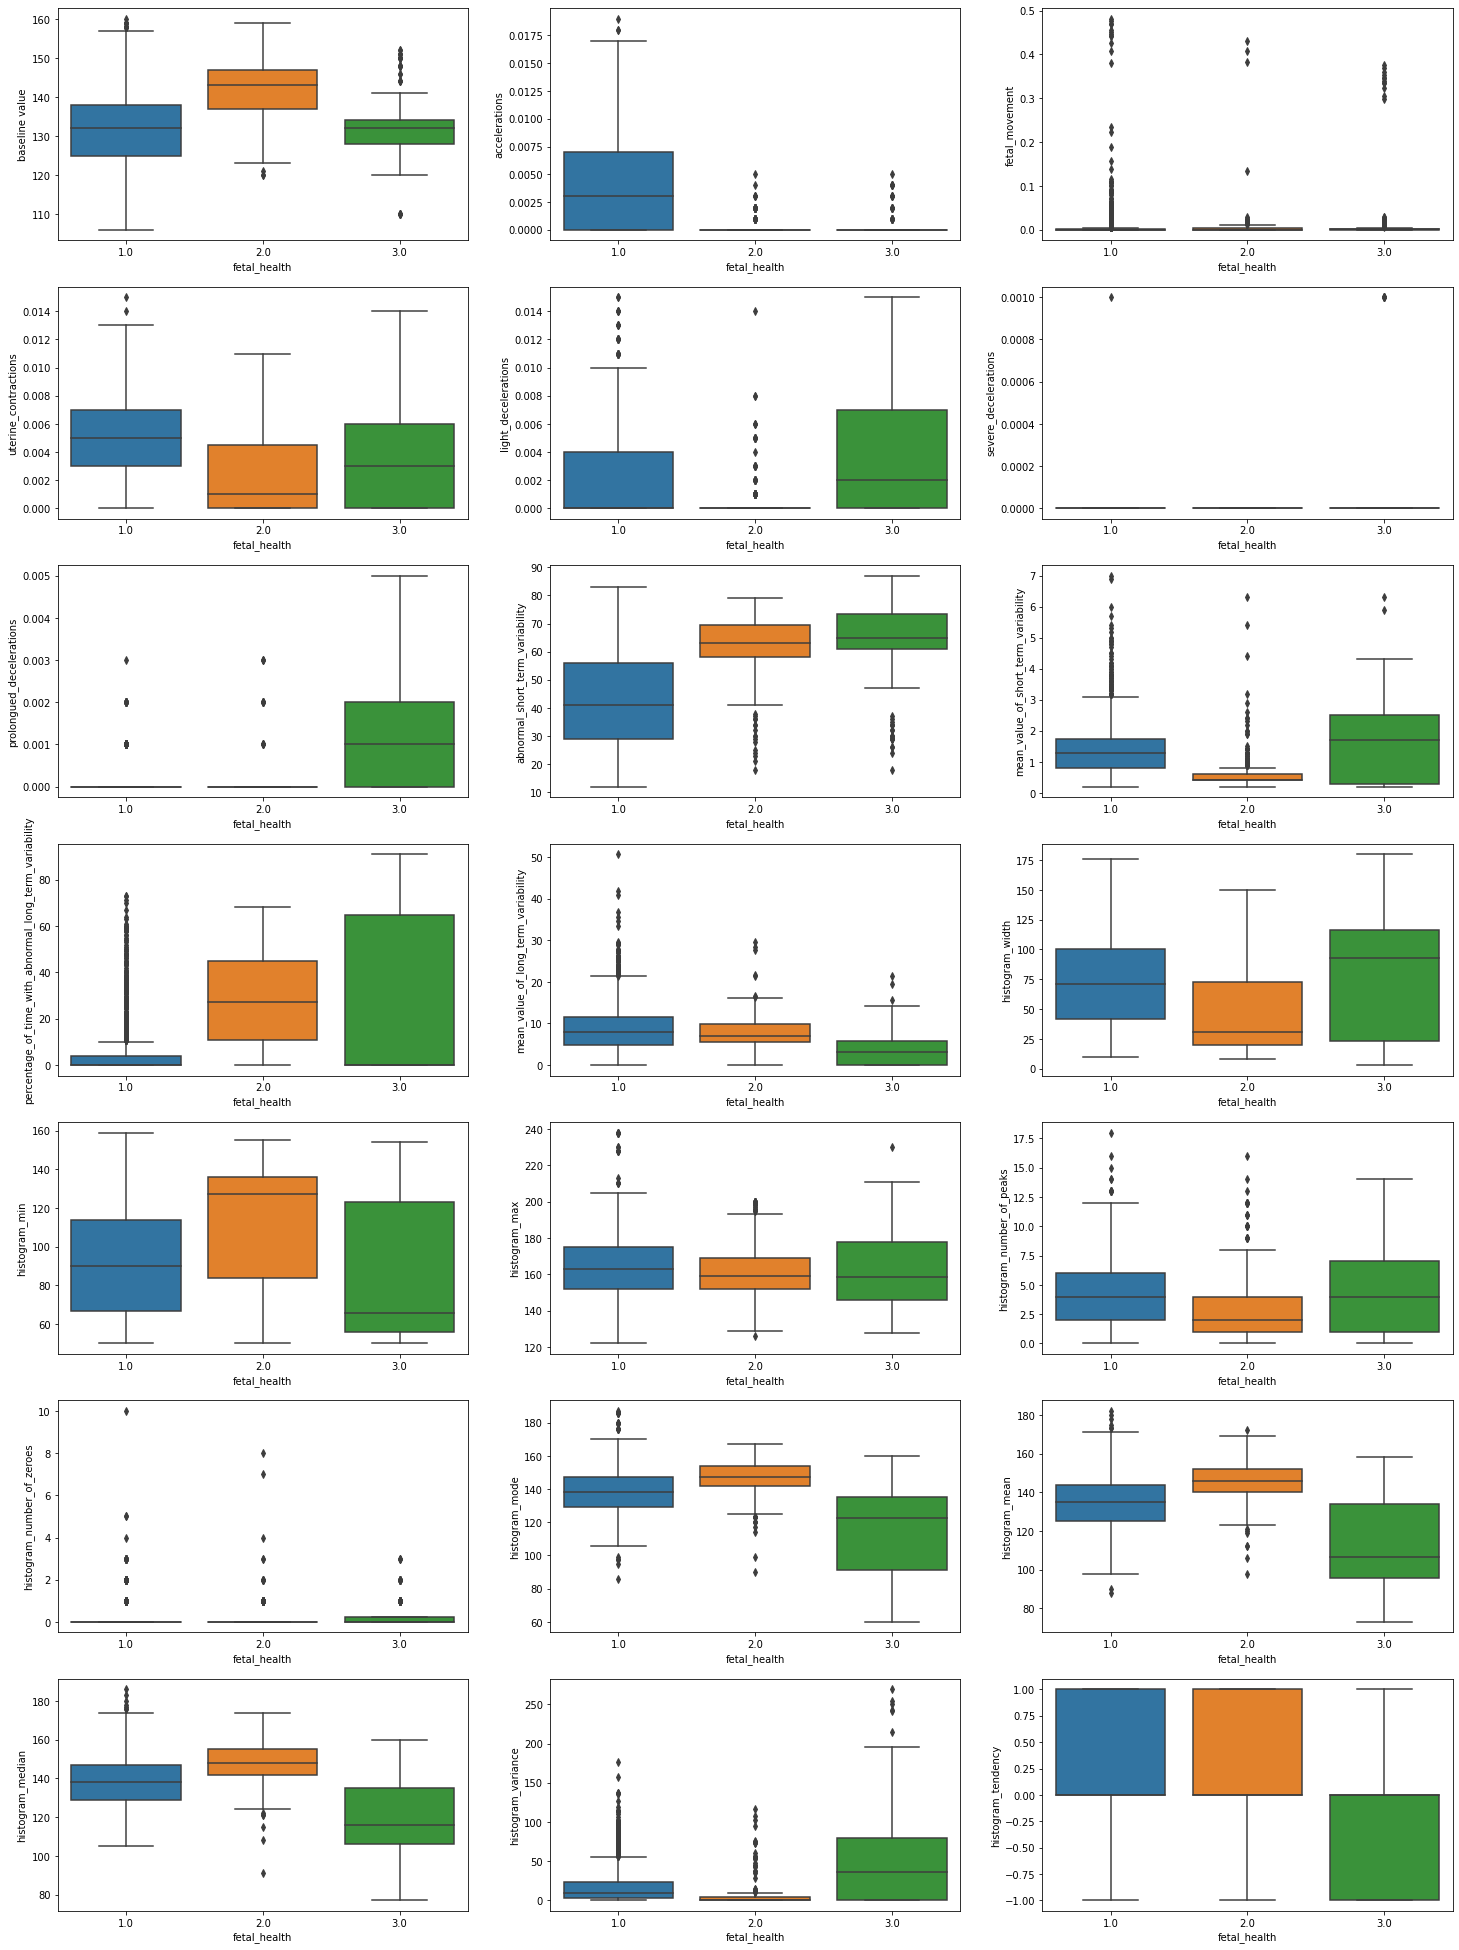

In [9]:
plt.figure(figsize=(25,35))
i=1
for feat in df.iloc[:,:-1].columns:
    plt.subplot(7,3,i)
    sns.boxplot(x='fetal_health',y=feat,data=df)
    i+=1

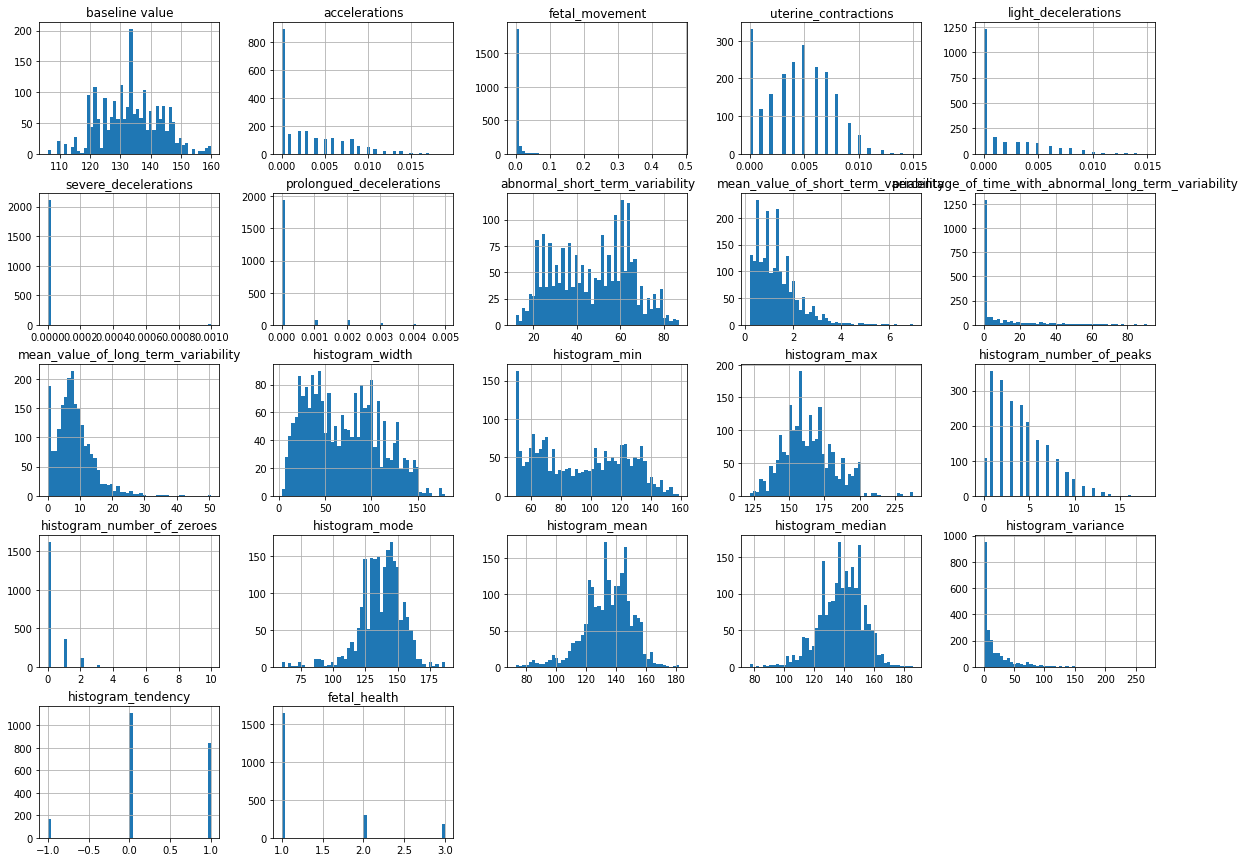

In [10]:
df.hist(bins=50,figsize=(20,15))
plt.show()

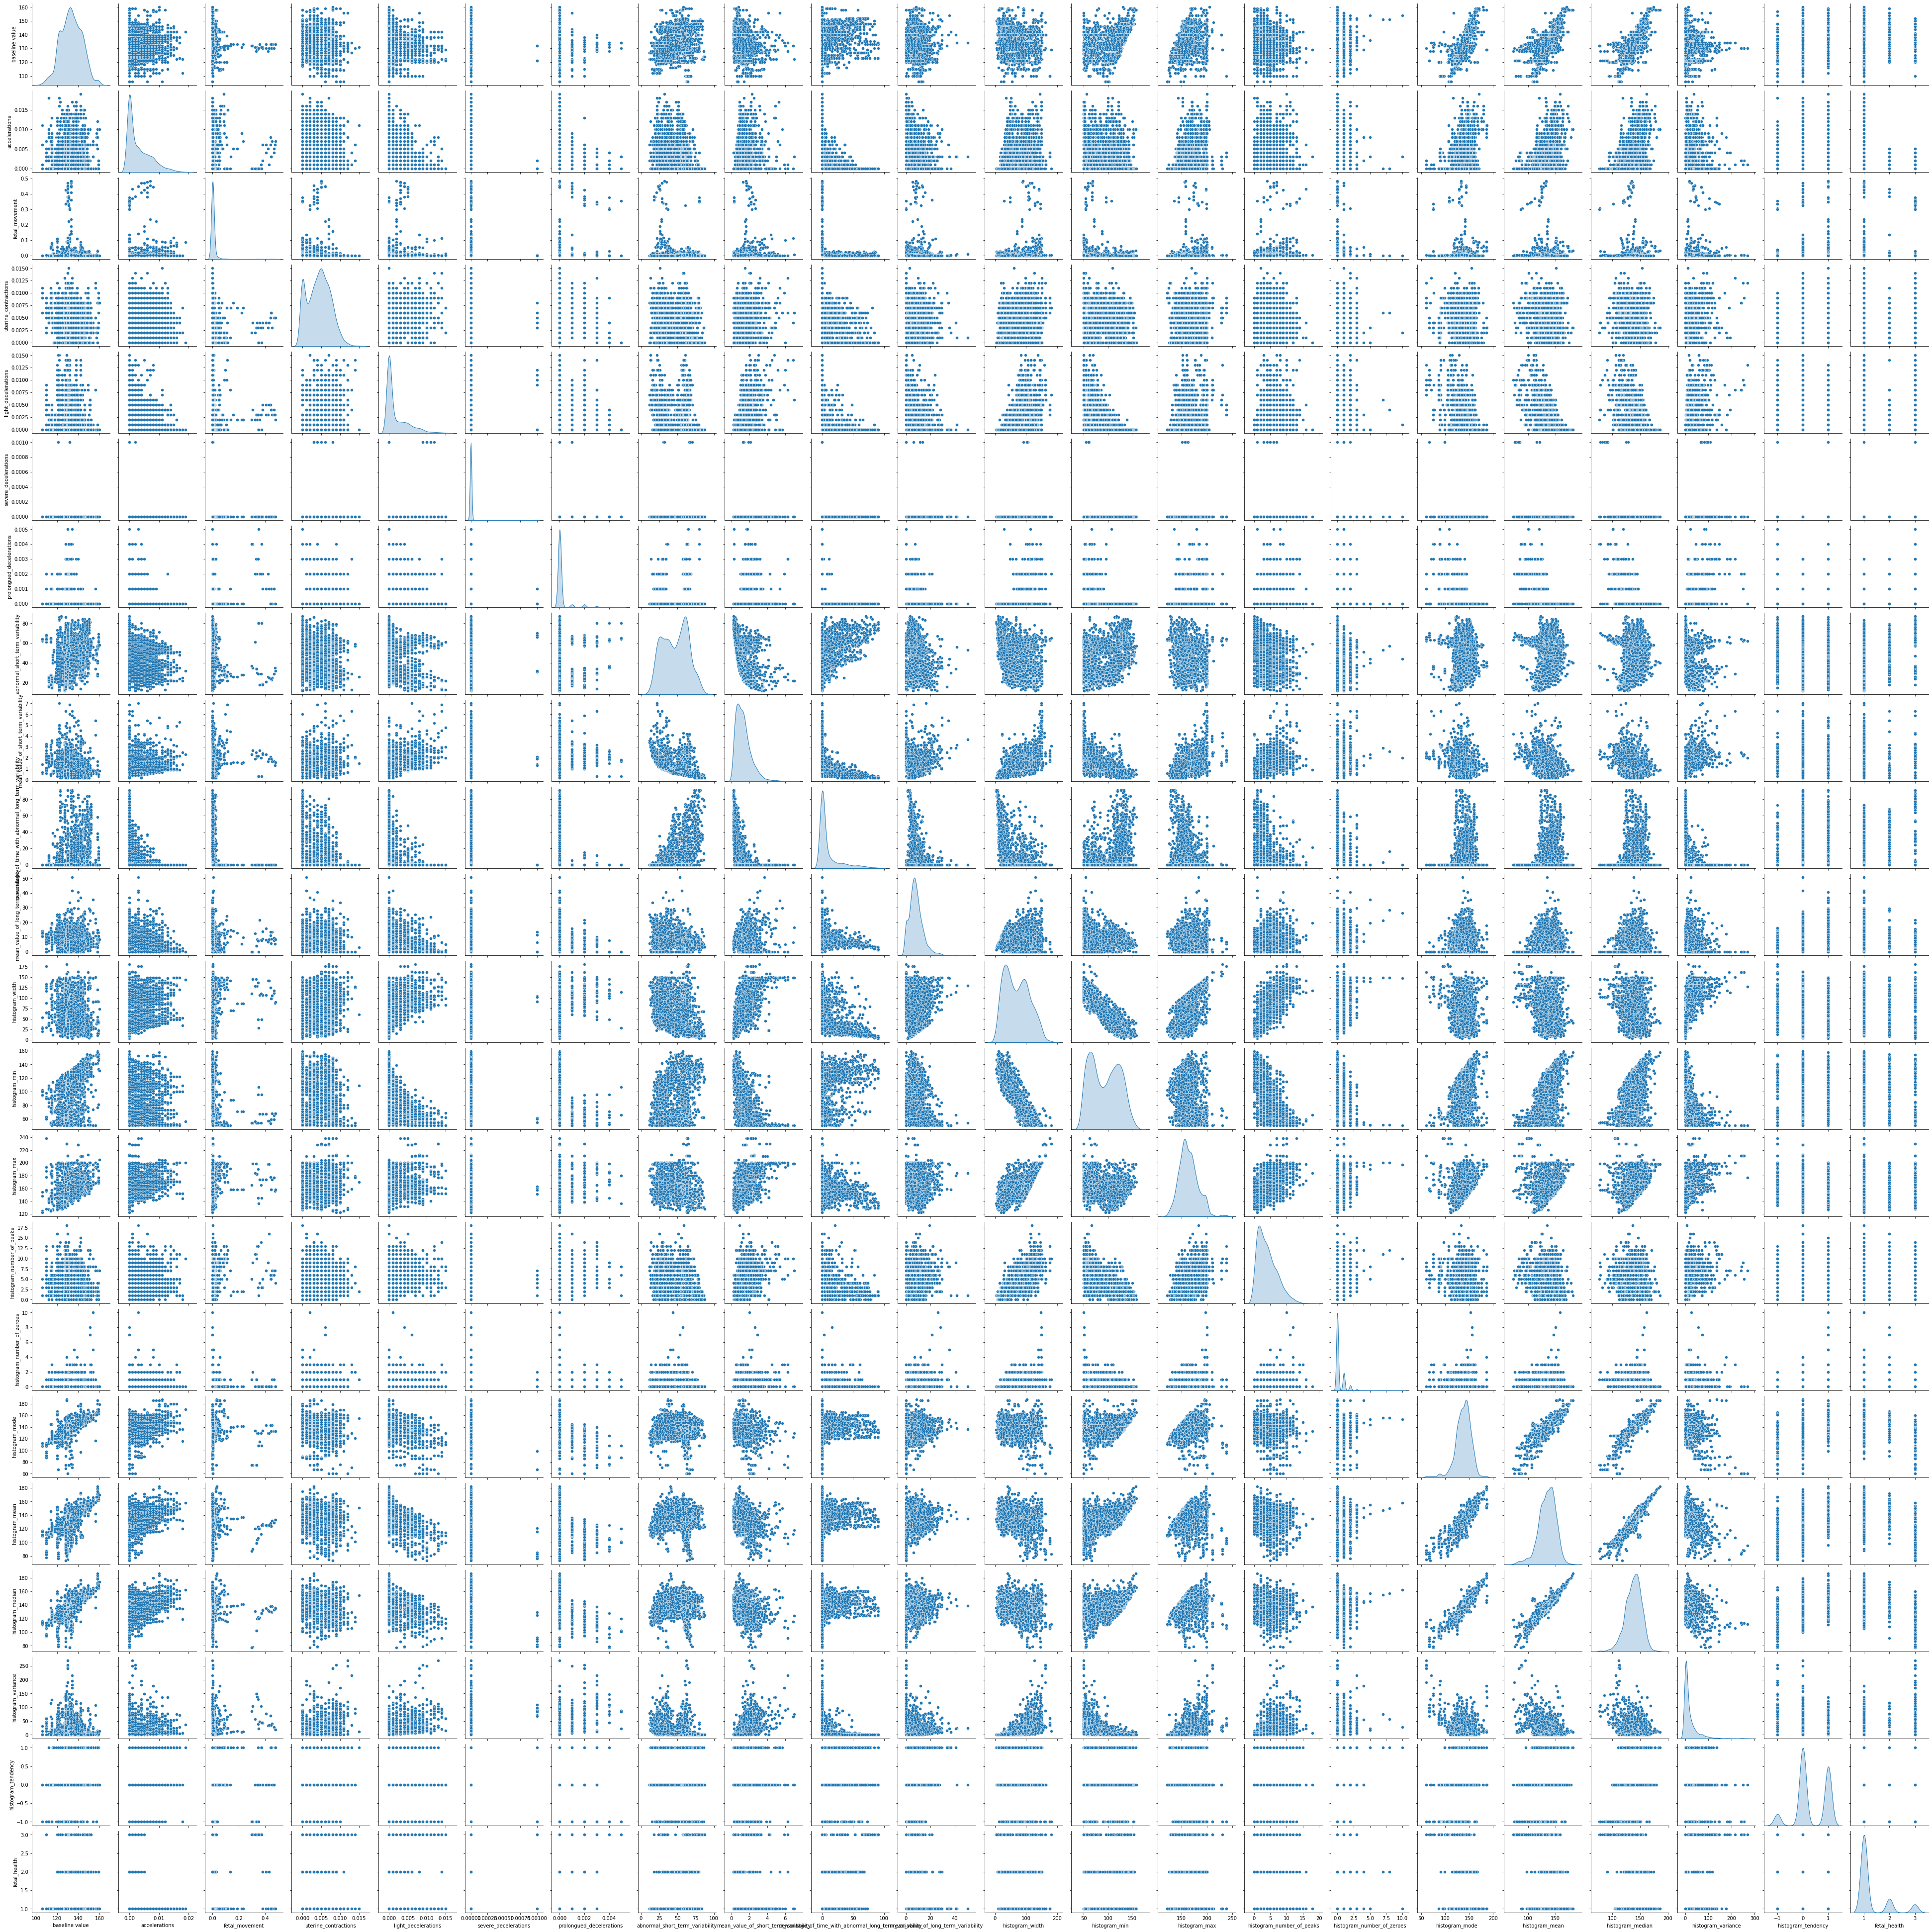

In [11]:
sns.pairplot(df , diag_kind = 'kde');

In [12]:
for col in df.columns:
    print(df[col].value_counts())

133.0    136
130.0    111
122.0    109
138.0    103
125.0     91
128.0     85
120.0     78
142.0     77
144.0     77
132.0     76
136.0     72
140.0     70
134.0     67
135.0     65
146.0     62
127.0     60
137.0     59
129.0     57
131.0     56
143.0     56
123.0     56
148.0     52
121.0     44
139.0     39
141.0     39
126.0     38
145.0     37
115.0     28
150.0     26
110.0     21
149.0     18
119.0     17
152.0     17
112.0     16
147.0     14
151.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
157.0      4
156.0      4
117.0      2
160.0      1
Name: baseline value, dtype: int64
0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64
0.000    1311
0.001     164
0.002     112
0.003

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


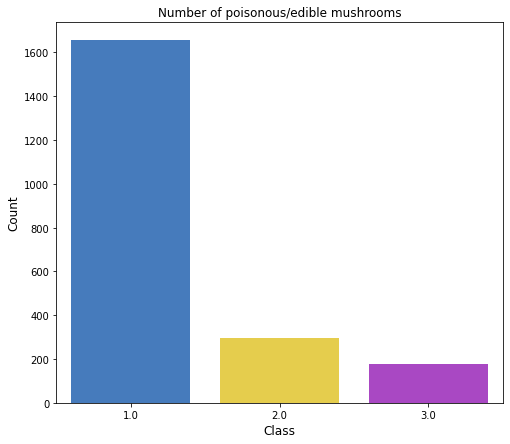

In [13]:
count = df['fetal_health'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

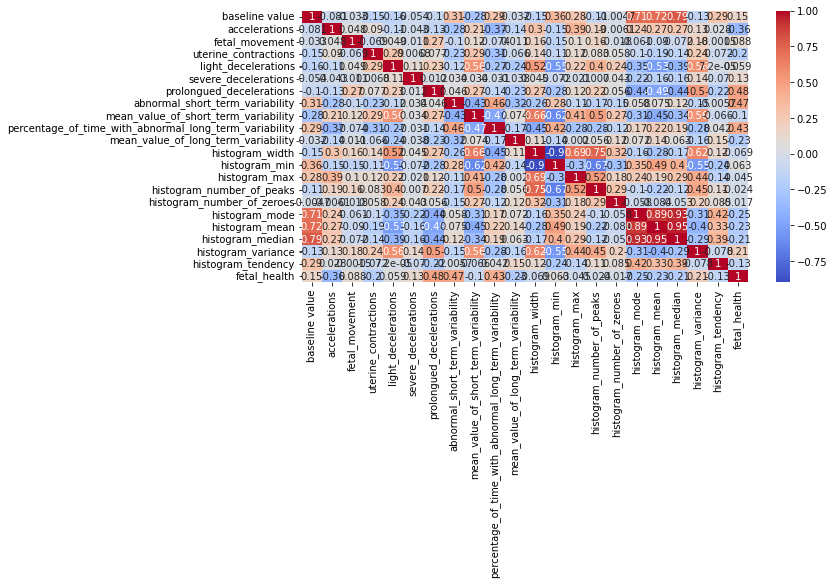

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True , cmap = 'coolwarm' );

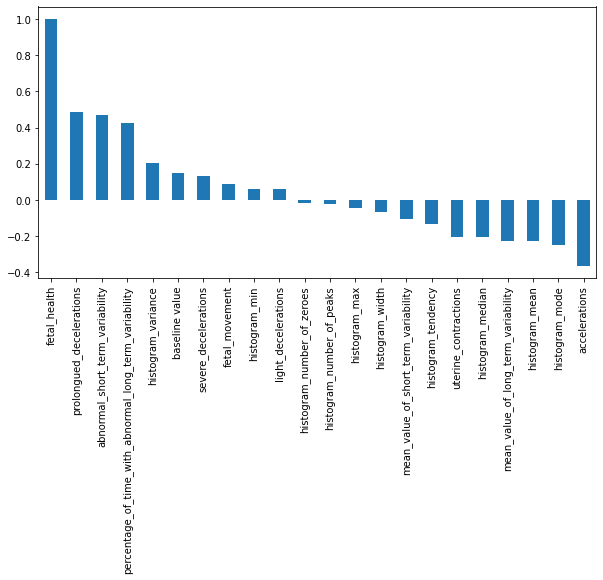

In [15]:
corr_mat = df.corr()
plt.figure(figsize = (10,5))
corr_mat['fetal_health'].sort_values(ascending = False).plot(kind = 'bar');

In [16]:
df.corr()['fetal_health'].abs().sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
histogram_mode                                            0.250412
histogram_mean                                            0.226985
mean_value_of_long_term_variability                       0.226797
histogram_variance                                        0.206630
histogram_median                                          0.205033
uterine_contractions                                      0.204894
baseline value                                            0.148151
histogram_tendency                                        0.131976
severe_decelerations                                      0.131934
mean_value_of_short_term_variability                      0.10

In [17]:
df = df.drop(["histogram_number_of_zeroes"],axis=1)
df = df.drop(["histogram_number_of_peaks"],axis=1)
df = df.drop(["histogram_max"],axis=1)
df = df.drop(["histogram_min"],axis=1)
df = df.drop(["histogram_width"],axis=1)
df = df.drop(["histogram_tendency"],axis=1)

In [18]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_mode  histogram_mean  \
0                                  2.4           120.0           137.0   
1                                 10.4           141.0           136.0   
2                                 13.4           141.0           135.0   
3                                 23.0           137.0           134.0   
4                                 19.9           137.0           136.0   

   histogram_median  histogram_variance  fetal_health  
0             121.0                73.0           2.0  
1             140.0                12.0           1.0  
2             138.0                13.0           1.0  
3             137.0                13.0           1.0  
4             138.0                11.0           1.0

In [19]:
'''from sklearn import preprocessing
columns = df.columns
for i in columns:
    if df.dtypes[i] is object:
        print("Cannot process object data")
    

## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise
scale_list = []
normalise_list = []
data_skew = df.skew()

for i in columns:
    if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:
        scale_list.append(i)
    else:
        normalise_list.append(i)
print(scale_list)
print(normalise_list)'''

'from sklearn import preprocessing\ncolumns = df.columns\nfor i in columns:\n    if df.dtypes[i] is object:\n        print("Cannot process object data")\n    \n\n## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise\nscale_list = []\nnormalise_list = []\ndata_skew = df.skew()\n\nfor i in columns:\n    if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:\n        scale_list.append(i)\n    else:\n        normalise_list.append(i)\nprint(scale_list)\nprint(normalise_list)'

In [20]:
'''col_names = ['baseline value', 'uterine_contractions', 'abnormal_short_term_variability', 'histogram_median']
features = df[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
print(features)
df[col_names] = features '''

"col_names = ['baseline value', 'uterine_contractions', 'abnormal_short_term_variability', 'histogram_median']\nfeatures = df[col_names]\nscaler = preprocessing.StandardScaler().fit(features.values)\nfeatures = scaler.transform(features.values)\nprint(features)\ndf[col_names] = features "

In [21]:
'''col_names = ['accelerations', 'fetal_movement', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_mode', 'histogram_mean', 'histogram_variance']
features = df[col_names]
scaler_1 = preprocessing.MinMaxScaler().fit(features.values)
features = scaler_1.transform(features.values)
df[col_names] = features
print(df)'''

"col_names = ['accelerations', 'fetal_movement', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_mode', 'histogram_mean', 'histogram_variance']\nfeatures = df[col_names]\nscaler_1 = preprocessing.MinMaxScaler().fit(features.values)\nfeatures = scaler_1.transform(features.values)\ndf[col_names] = features\nprint(df)"

In [22]:
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [23]:
from sklearn.linear_model import LogisticRegression

## lr = LogisticRegression(solver="lbfgs")
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100, 2)))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       159
         2.0       0.69      0.50      0.58        36
         3.0       0.76      0.72      0.74        18

    accuracy                           0.87       213
   macro avg       0.79      0.73      0.75       213
weighted avg       0.86      0.87      0.86       213

Test Accuracy: 86.85%


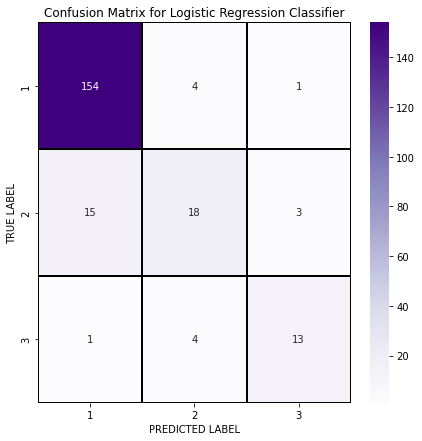

In [24]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ['1', '2', '3']
y_axis_labels = ['1', '2', '3']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

A = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)

    A.append((i, knn.score(X_test, y_test)*100)) 

print(A)

[(1, 92.01877934272301), (2, 91.07981220657277), (3, 92.48826291079813), (4, 91.07981220657277), (5, 90.61032863849765), (6, 89.2018779342723), (7, 89.2018779342723), (8, 89.67136150234741), (9, 88.26291079812206)]


In [29]:
from sklearn.ensemble import RandomForestClassifier
trees = np.arange(50, 1000, 50)
for i in trees:
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))
    print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Random Forest Classifier report: 

               precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       159
         2.0       0.84      0.86      0.85        36
         3.0       1.00      0.94      0.97        18

    accuracy                           0.95       213
   macro avg       0.94      0.92      0.93       213
weighted avg       0.95      0.95      0.95       213

Test Accuracy: 94.84%
Random Forest Classifier report: 

               precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       159
         2.0       0.83      0.83      0.83        36
         3.0       1.00      0.94      0.97        18

    accuracy                           0.94       213
   macro avg       0.93      0.92      0.92       213
weighted avg       0.94      0.94      0.94       213

Test Accuracy: 94.37%
Random Forest Classifier report: 

               precision    recall  f1-score   support

         1.0       0.96      0.

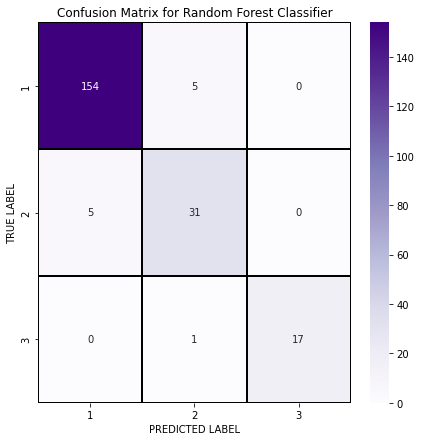

In [30]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ['1', '2', '3']
y_axis_labels = ['1', '2', '3']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [31]:
#Without using any processing method causes decreases in accuracy whiole using random forest